<a href="https://colab.research.google.com/github/AyushmanDatta/GDSC-ml-algorithm/blob/main/ClassificationModule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [4]:
import io
train=pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

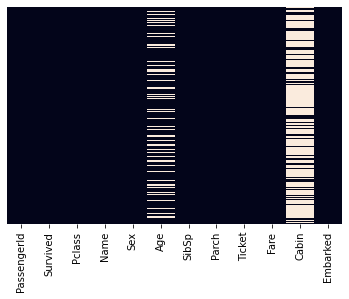

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [7]:
train.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

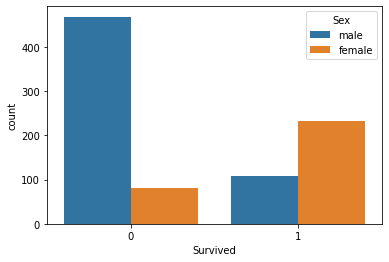

In [8]:
sns.countplot(x='Survived',data=train,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

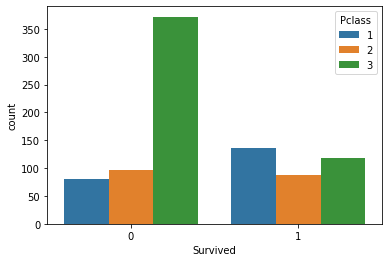

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: >

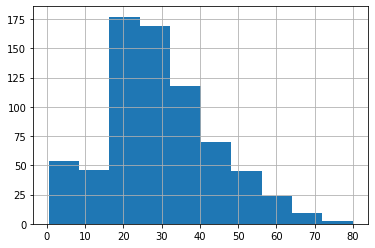

In [10]:
train['Age'].hist()

<Axes: xlabel='SibSp', ylabel='count'>

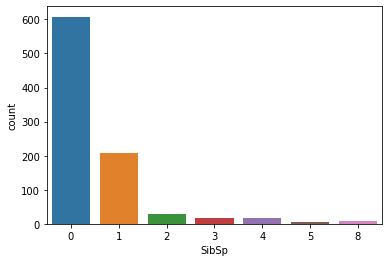

In [11]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

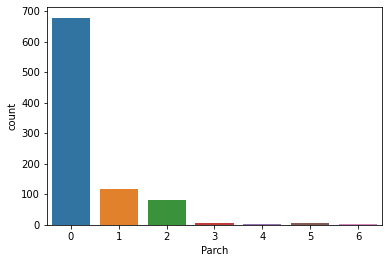

In [12]:
sns.countplot(x='Parch',data=train)

<Axes: >

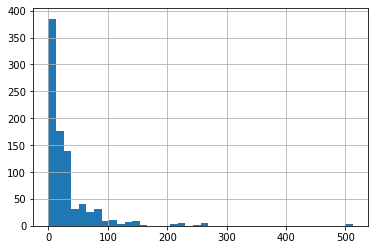

In [13]:
train['Fare'].hist(bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

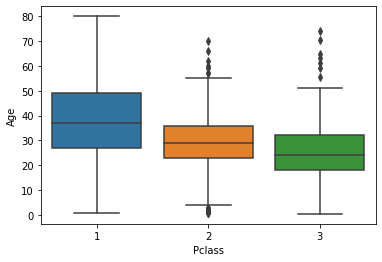

In [14]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
from tables.table import Col
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age;

<Axes: >

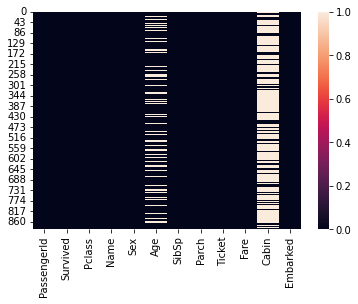

In [16]:
sns.heatmap(train.isnull())

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

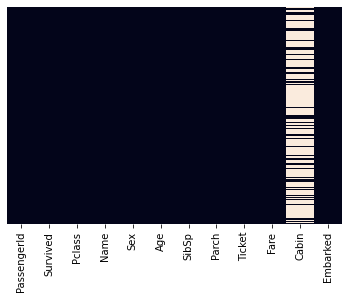

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [19]:
train['Embarked']=train['Embarked'].fillna('S')

<Axes: xlabel='Embarked', ylabel='count'>

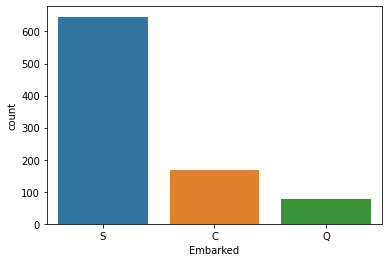

In [20]:
sns.countplot(x='Embarked',data=train)

In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
train.drop(['Sex','Name','Embarked','Ticket'], axis=1,inplace=True)

In [27]:
train=pd.concat([train,sex,embark],axis=1)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),train['Survived'], test_size=0.10,random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel =LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,predictions))

[[46  5]
 [19 20]]


In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        51
           1       0.80      0.51      0.62        39

    accuracy                           0.73        90
   macro avg       0.75      0.71      0.71        90
weighted avg       0.75      0.73      0.72        90



In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
dt_pred = dt_model.predict(X_test)

In [44]:
print(confusion_matrix(y_test,dt_pred))

[[43  8]
 [15 24]]


In [45]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

    accuracy                           0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90

